In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns

## Biosecurity Trends

Here we will explore trends in biosecurity, starting with the historical frequency of natural epidemics by disease category.

In [2]:
# Define vars
xlsx_path = 'data/Epidemics dataset 21 March 2021.xlsx'
start_year = 1600
end_year = 2030
period = 10

In [3]:
# Load data
xls = pd.ExcelFile(xlsx_path)
data = pd.read_excel(xls, 'Sheet1', nrows=539)
filtered_data = data[data["# deaths (thousands)"] != -999]
filtered_data = filtered_data[filtered_data["Start Year"] >= start_year]

# Get a list of all diseases
diseases = filtered_data["Disease"].unique().tolist()

# Generated by ChatGPT
disease_category = {
    'Smallpox': 'Virus',
    'Smallpox, etc.': 'Uncategorized',
    'Unknown': 'Unknown',
    'Typhus': 'Bacteria',
    'Cocolitzli': 'Unknown',
    'Plague': 'Bacteria',
    'Diphtheria': 'Bacteria',
    'Measles': 'Virus',
    'Yellow Fever': 'Virus',
    'Rubella': 'Virus',
    'Typhus, Disentery': 'Multiple Agents',
    'Influenza': 'Virus',
    'Dysentery': 'Uncategorized',
    'Typhus, Relapsing Fever, Dysentery': 'Multiple Agents',
    'Venereal Disease': 'Multiple Agents',
    'Scarlet Fever': 'Uncategorized',
    'Meningitis': 'Multiple Agents',
    'Cholera': 'Bacteria',
    'Miliary Fever': 'Multiple Agents',
    'Visceral Leishmaniasis': 'Other Parasites',
    'Typhoid': 'Bacteria',
    'Whooping Cough': 'Bacteria',
    'Polio': 'Virus',
    'Sleeping Sickness': 'Other Parasites',
    'Pneumonia': 'Multiple Agents',
    'Tuberculosis': 'Bacteria',
    'Murray Valley Encephalitis': 'Virus',
    'Encephalitis': 'Multiple Agents',
    'Relapsing fever': 'Other Parasites',
    'Dengue': 'Virus',
    'Schistosomiasis': 'Other Parasites',
    'Mumps': 'Virus',
    'West Nile': 'Virus',
    'Kyasanur Forest Disease': 'Virus',
    'Hemorragic Fever': 'Uncategorized',
    'Ebola': 'Virus',
    "Legionnaires' Disease": 'Bacteria',
    'Rift Valley Fever': 'Virus',
    'SARS': 'Virus',
    'MERS': 'Virus',
    'COVID-19': 'Virus',
    'Malaria': 'Other Parasites',
    'AIDS': 'Virus',
    None: 'Unknown'
}

# Add a new column to the dataframe with the disease category
filtered_data["Disease Category"] = filtered_data["Disease"].map(disease_category)

In [4]:
# For each decade, calculate the number of epidemics by disease category
decades = range(start_year, end_year, period)
decades_data = []

for decade in decades:
    # Filter data for the current decade
    decade_data = filtered_data[(filtered_data["Start Year"] >= decade) & (filtered_data["End Year"] < decade + period)]
    # Group by both Disease Category and Disease, then count the occurrences
    decade_data = decade_data.groupby("Disease Category").agg(
        Count=('Disease', 'size'),
        Diseases=('Disease', lambda x: list(x.unique())),
        Locations=('Location', lambda x: list(x.unique())),
    ).reset_index()
    decade_data["Decade"] = decade
    decades_data.append(decade_data)

decades_data = pd.concat(decades_data)
decades_data = decades_data.reset_index(drop=True)
decades_data

,Disease Category,Count,Diseases,Locations,Decade
0,Bacteria,1,[Plague],[Basel],1610
1,Virus,1,[Smallpox],[Massachusetts],1610
2,Bacteria,2,[Plague],"[Algiers, London]",1620
3,Bacteria,2,"[Typhus, Plague]","[Protestant-Catholic armies at Nuremburg, Lond...",1630
4,Bacteria,1,[Typhus],[Tiverton],1640
...,...,...,...,...,...
95,Other Parasites,1,[Visceral Leishmaniasis],[India],1980
96,Bacteria,1,[Diphtheria],[Russia],1990
97,Multiple Agents,1,[Meningitis],[Burundi],1990
98,Virus,2,"[SARS, Influenza]","[Global SARS, Swine Flu]",2000


In [5]:
# Reformat the data to be used in a stackplot
stackplot_data = decades_data.pivot(index="Decade", columns="Disease Category", values="Count").fillna(0)
stackplot_data.head()

Disease Category,Bacteria,Multiple Agents,Other Parasites,Uncategorized,Unknown,Virus
Decade,,,,,,
1610,1.0,0.0,0.0,0.0,0.0,1.0
1620,2.0,0.0,0.0,0.0,0.0,0.0
1630,2.0,0.0,0.0,0.0,0.0,0.0
1640,1.0,0.0,0.0,0.0,0.0,1.0
1650,1.0,0.0,0.0,0.0,0.0,1.0


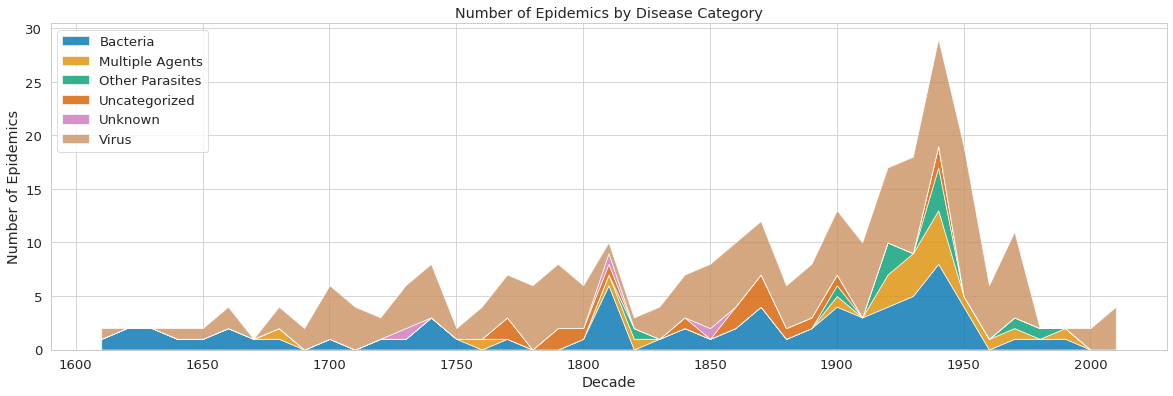

In [6]:
# Plot the number of epidemics by disease category as a stackplot
sns.set(style="whitegrid", palette="colorblind", font_scale=1.5, context="paper")
fig, ax = plt.subplots(figsize=(20, 6))
plt.stackplot(stackplot_data.index, stackplot_data.values.T, labels=stackplot_data.columns, alpha=0.8)
plt.legend(loc='upper left')
plt.title("Number of Epidemics by Disease Category")
plt.xlabel("Decade")
plt.ylabel("Number of Epidemics")
plt.show()

In [7]:
# Create a mapping from (decade, disease category) to diseases list
decade_category_to_count = {(row['Decade'], row['Disease Category']): row['Count'] for index, row in decades_data.iterrows()}
decade_category_to_diseases = {(row['Decade'], row['Disease Category']): row['Diseases'] for index, row in decades_data.iterrows()}
decade_category_to_locations = {(row['Decade'], row['Disease Category']): row['Locations'] for index, row in decades_data.iterrows()}

# Prepare the data
data = []
for col in stackplot_data.columns:
    hover_text = []
    for idx in stackplot_data.index:
        count = decade_category_to_count.get((idx, col), 0)
        diseases = decade_category_to_diseases.get((idx, col), [])
        locations = decade_category_to_locations.get((idx, col), [])
        hover_text.append(f"{col}<br>Count: {count}<br>Decade: {idx}<br>Diseases: {'; '.join(diseases)}<br>Locations: {'; '.join(locations)}")
    data.append(go.Scatter(x=stackplot_data.index, y=stackplot_data[col], mode='lines', stackgroup='one', name=col, hoverinfo='text', text=hover_text))
# Compute the average total number of epidemics per decade
average_total_epidemics = stackplot_data.sum(axis=1).mean()

# Create the figure
fig = go.Figure(data=data)
fig.update_layout(title='Number of Epidemics by Disease Category',
                  xaxis_title='Decade',
                  yaxis_title='Number of Epidemics',
                  legend_title='Disease Category',
                  plot_bgcolor='white',
                  paper_bgcolor='white',
)
# Add a horizontal line for the average total number of epidemics per decade
fig.add_shape(type="line", x0=stackplot_data.index.min(), y0=average_total_epidemics, x1=stackplot_data.index.max(), y1=average_total_epidemics, line=dict(color="black", width=2, dash="dash"))
fig.add_annotation(x=stackplot_data.index.min() + 50, y=average_total_epidemics, text=f"Average Total Epidemics per Decade: {average_total_epidemics:.2f}", showarrow=False, yshift=10)
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
# Update x-axis limits
fig.update_xaxes(range=[stackplot_data.index.min(), stackplot_data.index.max()])
fig.show()